In [8]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [15]:
import pandas as pd
data = pd.read_csv("test1.csv")
data["pred return"] =  data["adj_close"]/data["adj_close"].shift(1)  - 1
data["pred return"] = data["pred return"].fillna(0)
data.head()

,Unnamed: 0,date,adj_close,pred return
0,0,2017-04-24,146.73074,0.000000
1,1,2017-04-25,146.89404,0.001113
2,2,2017-04-26,147.23627,0.002330
3,3,2017-04-27,147.68230,0.003029
4,4,2017-04-28,148.12560,0.003002


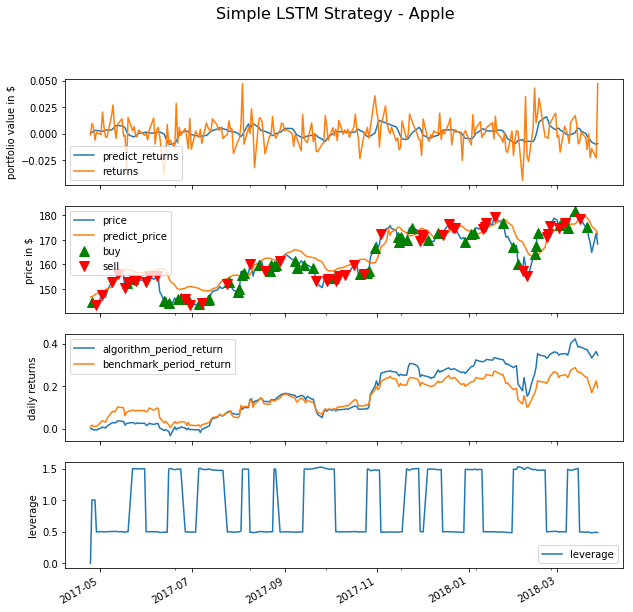

Final portfolio value (including cash): 1345425.75$


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-04-24 20:00:00+00:00,NaN,0.000000,NaN,0.009629,NaN,NaN,0.000000e+00,1000000.000000,0.000,0.000,...,0.0,0.0,0,NaN,1000000.000000,0.000,0.000,1,[],0.0
2017-04-25 20:00:00+00:00,0.005725,-0.000510,-0.308138,0.015957,0.037741,0.151694,-1.006653e+06,-6652.972470,1006142.940,1006142.940,...,0.0,0.0,0,-11.224972,1000000.000000,0.000,0.000,2,"[{'dt': 2017-04-25 20:00:00+00:00, 'order_id':...",0.0
2017-04-26 20:00:00+00:00,0.054623,-0.006705,-0.593736,0.009700,0.132014,0.410306,0.000000e+00,-6652.972470,999947.650,999947.650,...,0.0,0.0,0,-9.885885,-6652.972470,1006142.940,1006142.940,3,[],0.0
2017-04-27 20:00:00+00:00,0.051393,-0.005731,-0.453897,0.010685,0.109286,0.360613,0.000000e+00,-6652.972470,1000922.190,1000922.190,...,0.0,0.0,0,-7.309315,-6652.972470,999947.650,999947.650,4,[],0.0
2017-04-28 20:00:00+00:00,0.044529,-0.006960,-0.402099,0.009700,0.098133,0.331699,5.029508e+05,496297.871555,496741.700,496741.700,...,0.0,0.0,0,-7.796699,-6652.972470,1000922.190,1000922.190,5,"[{'dt': 2017-04-28 20:00:00+00:00, 'order_id':...",0.0
2017-05-01 20:00:00+00:00,0.085450,0.003241,-0.410875,0.030433,0.149036,0.525009,0.000000e+00,496297.871555,506942.800,506942.800,...,0.0,0.0,0,3.381324,496297.871555,496741.700,496741.700,6,[],0.0
2017-05-02 20:00:00+00:00,0.079529,0.006385,-0.371150,0.036831,0.136230,0.529460,5.307669e+03,501605.540375,504779.220,504779.220,...,0.0,0.0,0,6.095817,496297.871555,506942.800,506942.800,7,"[{'dt': 2017-05-02 20:00:00+00:00, 'order_id':...",0.0
2017-05-03 20:00:00+00:00,0.074903,0.004845,-0.312004,0.033671,0.134374,0.501756,0.000000e+00,501605.540375,503239.320,503239.320,...,0.0,0.0,0,4.226511,501605.540375,504779.220,504779.220,8,[],0.0
2017-05-04 20:00:00+00:00,0.071225,0.003031,-0.271509,0.029944,0.132273,0.483229,0.000000e+00,501605.540375,501425.660,501425.660,...,0.0,0.0,0,2.429390,501605.540375,503239.320,503239.320,9,[],0.0
2017-05-05 20:00:00+00:00,0.078103,0.011347,-0.265168,0.047020,0.141375,0.508898,0.000000e+00,501605.540375,509741.120,509741.120,...,0.0,0.0,0,8.453580,501605.540375,501425.660,501425.660,10,[],0.0


In [114]:
%%zipline --start 2017-4-23 --end 2018-3-27 --capital-base 1000000 -o LSTM_model1.pkl
from zipline.api import order_target_percent, record, symbol,get_datetime,set_benchmark,order
from zipline.finance import commission
from zipline import run_algorithm
import matplotlib.pyplot as plt
import numpy as np
import pytz
import pandas as pd
import datetime
import pickle
from zipline.utils.factory import create_returns_from_list  


# parameters 
ma_periods = 3
selected_stock = 'AAPL'
#with open('Apple_model.pickle','rb') as f:
    #Apple.pickle = pickle.load(f)

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    set_benchmark(symbol('AAPL'))
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.001, min_trade_cost=0))
def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    #if context.time < ma_periods:
        #return
    # 3. access price history
    price_history = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
    return1 = price_history[1]/price_history[0]- 1
    pred = pd.read_csv("test1.csv")
    pred["pred return"] =  pred["adj_close"]/pred["adj_close"].shift(1) - 1
    pred["pred return"] = pred["pred return"].fillna(0)
    pred["date"] = pd.to_datetime(pred["date"])
    # 4. calculate moving averages
    #ma2 = price_history.mean()
    tday=get_datetime().date()
    pr1 = pred[pred["date"]==tday]["pred return"].values
    ma1 =pred[pred["date"]==tday]["adj_close"].values
    try:
        ma = ma1[0]
        pr = pr1[0]
    except:
        ma = price_history.mean()
        date= tday-datetime.timedelta(days=1)
        if date == '2017-08-07':
            pr = pred[pred["date"]=='2017-08-05']["pred return"].values
        else:
            pr = pred[pred["date"]=='2017-11-07']["pred return"].values
        pr=pr[0]
    # 5. trading logic
    if(return1*pr)<=0:
        if pr == 0:
            order_target_percent(context.asset, 1)
        if return1 <0 and pr>0:
            order_target_percent(context.asset, 0.5)
        elif return1 > 0 and pr<0:
            order_target_percent(context.asset, 1.5)
            
    #if pr == 0:
        #order_target_percent(context.asset, 1)
    #elif pr>0:
        #order_target_percent(context.asset, pr)
    #elif pr<0:
        #print(pr)
        #order_target_percent(context.asset, pr)

    # save values for later inspection
    record(price=data.current(context.asset, 'price'),
           predict_price=ma,predict_returns=pr,returns =return1,leverage=context.account.leverage)
# 6. analyze block
def analyze(context, perf):
    fig, ax = plt.subplots(4, 1, sharex=True, figsize=[10,10])
    # portfolio value
    perf[['predict_returns', 'returns']].plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf[['price', 'predict_price']].plot(ax=ax[1])
    ax[1].set_ylabel('price in $')
    
    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.algorithm_period_return.plot(ax=ax[2])
    perf.benchmark_period_return.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')
    ax[2].legend()
    
    perf.leverage.plot(ax=ax[3])
    ax[3].set_ylabel('leverage')
    ax[3].legend()
    
    fig.suptitle('Simple LSTM Strategy - Apple', fontsize=16)
    plt.legend()
    plt.show()
    
    print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipline
import warnings
import pyfolio as pf
LSTM_model1_results = pd.read_pickle('LSTM_model1.pkl')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(LSTM_model1_results)

Start date,2017-04-24
End date,2018-03-27
Total months,11
,Backtest
Annual return,24.2%
Cumulative returns,22.3%
Annual volatility,20.9%
Sharpe ratio,1.14
Calmar ratio,1.81
Stability,0.74
Max drawdown,-13.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.35,2018-01-19,2018-02-09,2018-03-12,37
1,9.23,2018-03-13,2018-03-26,NaT,NaN
2,8.86,2017-05-15,2017-06-19,2017-08-03,59
3,8.23,2017-09-05,2017-09-26,2017-10-31,41
4,4.08,2017-12-19,2018-01-02,2018-01-16,21


Stress Events,mean,min,max
New Normal,0.09%,-4.42%,4.75%


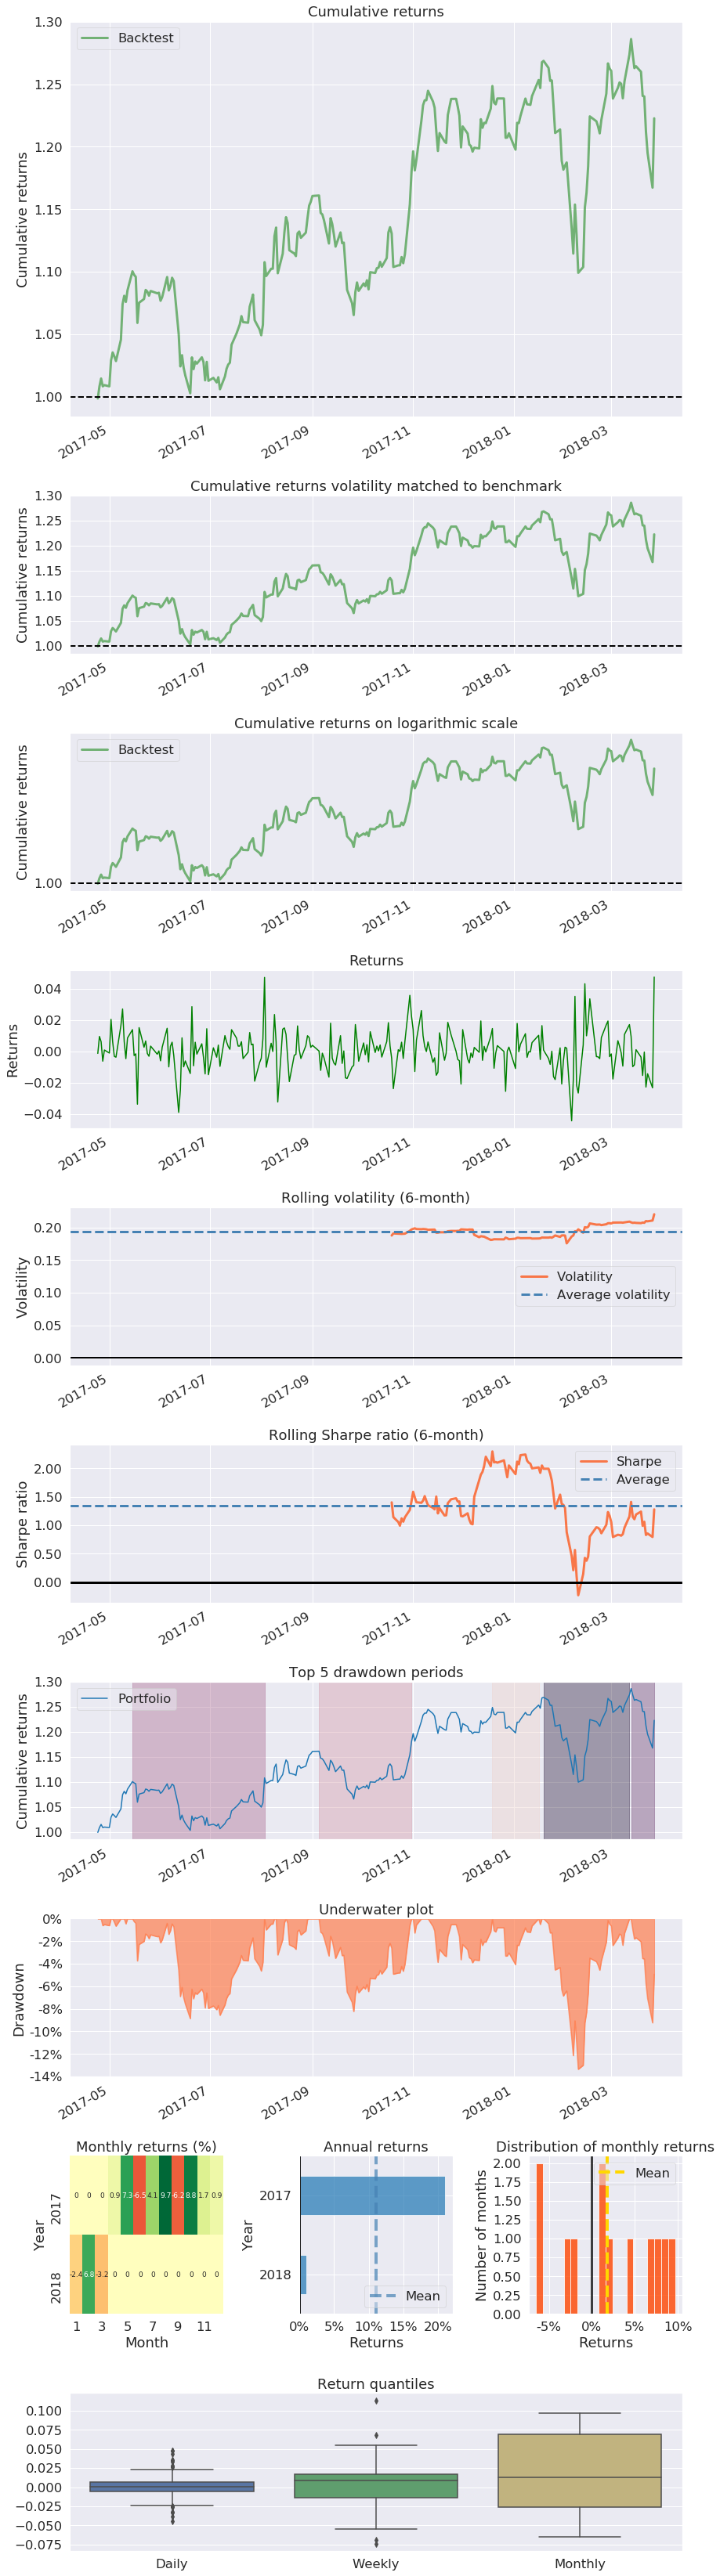

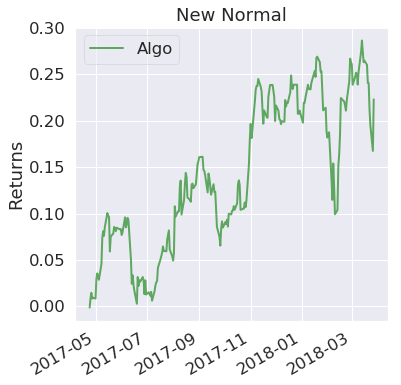

In [117]:
pf.create_full_tear_sheet(returns)